In [1]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns
import nltk
from typing import Set, List, Dict
import functools
from collections import Counter
import csv
import pathlib
import stopwordsiso as stopwords
import textgrid
import sox

In [13]:
ms = os.listdir("/home/mark/tinyspeech_harvard/xfer_experiments")
for m in ms:
    #print(m)
    #print(m[25:])
    epochs="_epochs_"
    valacc=m.find("_val_acc")
    print(m[25:valacc].split("_"))

25
['began', 'these', 'best', 'based', 'over']
25
['need', 'would', 'thing', 'local', 'most']
25
['also', 'best', 'written', 'between', 'years']
25
['called', 'look', 'north', 'system', 'then']
25
['long', 'public', 'include', 'county', 'end']
25
['north', 'even', 'public', 'become', 'east']
25
['could', 'appeared', 'house', 'must', 'just']
25
['mean', 'sun', 'make', 'well', 'war']
25
['going', 'work', 'great', 'set', 'friend']


In [12]:
scv1 = "/home/mark/tinyspeech_harvard/scv1/"
ds = os.listdir(scv1)
ds

['left',
 'three',
 'on',
 '_background_noise_',
 'house',
 'stop',
 'tree',
 'go',
 'bed',
 'marvin',
 'zero',
 'six',
 'sheila',
 'no',
 'one',
 'nine',
 'two',
 'five',
 'four',
 'testing_list.txt',
 'dog',
 'validation_list.txt',
 'off',
 'LICENSE',
 'bird',
 'eight',
 'cat',
 'right',
 'down',
 'up',
 'wow',
 'happy',
 'speech_commands_v0.01.tar.gz',
 'README.md',
 'seven',
 'yes']

In [13]:
ds = [d for d in ds if os.path.isdir(scv1 + d)]
ds

['left',
 'three',
 'on',
 '_background_noise_',
 'house',
 'stop',
 'tree',
 'go',
 'bed',
 'marvin',
 'zero',
 'six',
 'sheila',
 'no',
 'one',
 'nine',
 'two',
 'five',
 'four',
 'dog',
 'off',
 'bird',
 'eight',
 'cat',
 'right',
 'down',
 'up',
 'wow',
 'happy',
 'seven',
 'yes']

In [18]:
with open("/home/mark/tinyspeech_harvard/tinyspeech_images/scv1.csv",'w') as fh:
    for d in ds:
        if d == '_background_noise_':
            continue
        wavs = glob.glob(scv1 + d + "/*.wav")

        print(d,len(wavs))
        fh.write(f"{d},{len(wavs)}\n")

left 2353
three 2356
on 2367
house 1750
stop 2380
tree 1733
go 2372
bed 1713
marvin 1746
zero 2376
six 2369
sheila 1734
no 2375
one 2370
nine 2364
two 2373
five 2357
four 2372
dog 1746
off 2357
bird 1731
eight 2352
cat 1733
right 2367
down 2359
up 2375
wow 1745
happy 1742
seven 2377
yes 2377


In [2]:
sns.set(font_scale=1.4)

# frequent words

In [3]:
words = os.listdir("../frequent_words/en/clips/")

In [8]:
c = Counter()
for w in words:
    wavs = glob.glob(f"../frequent_words/en/clips/{w}/*.wav")
    c[w] = len(wavs)

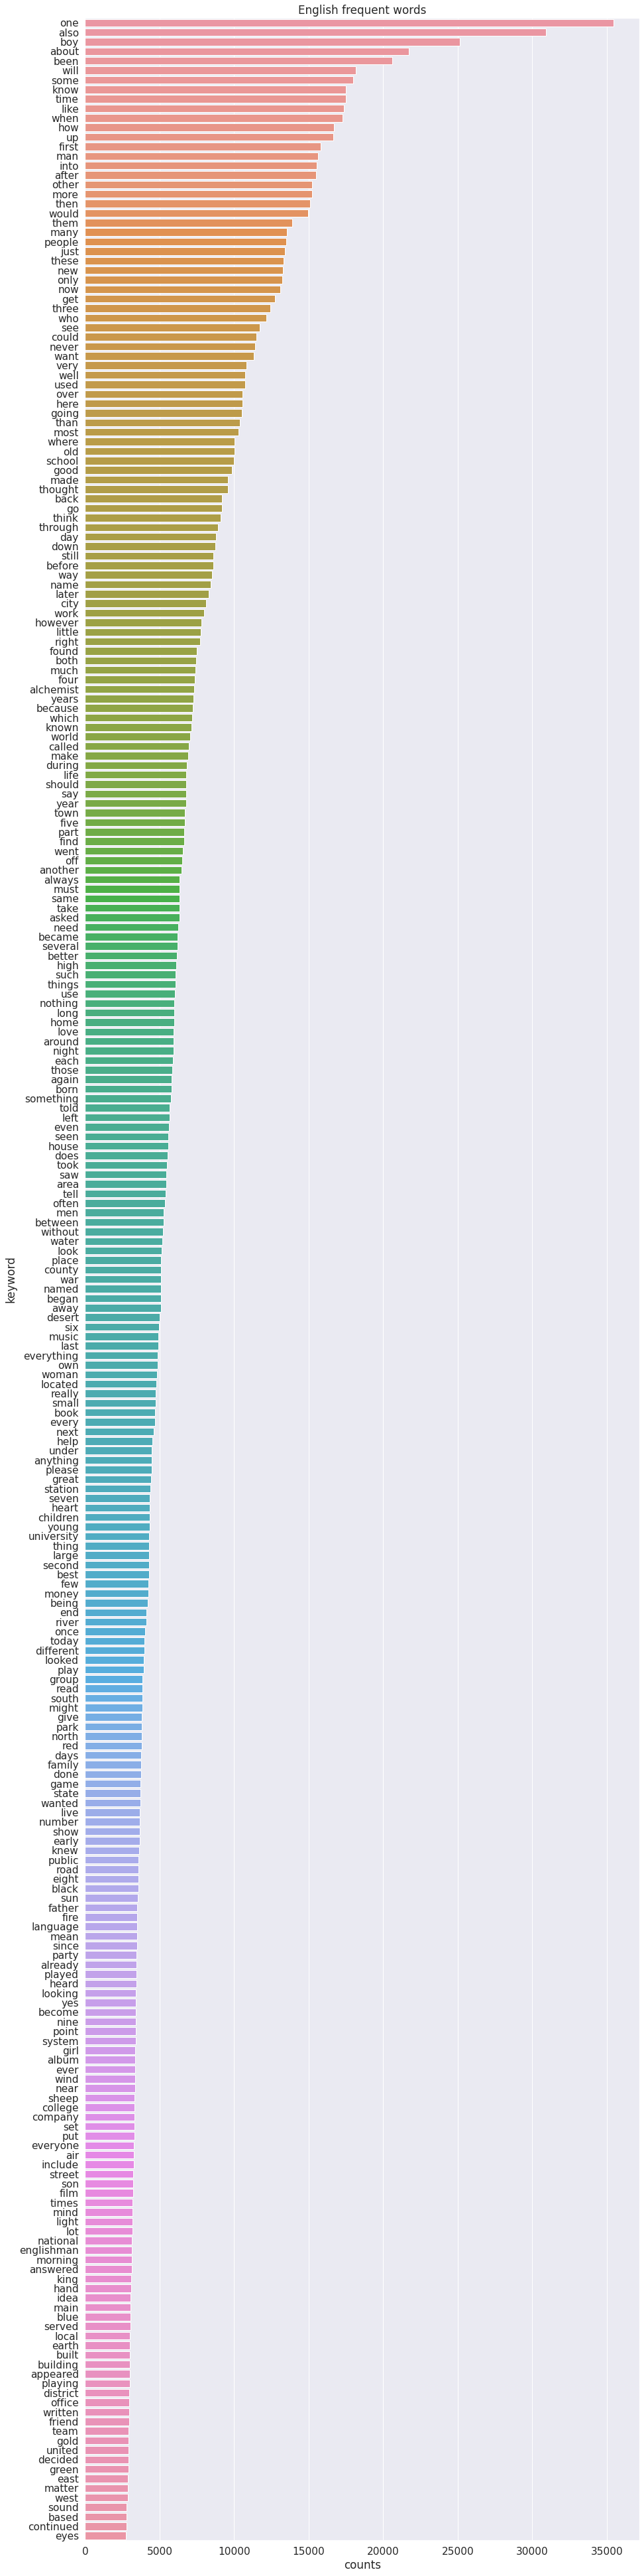

In [19]:
def plot_counts(counts, title):
    df = pd.DataFrame(c.most_common(), columns=["keyword", "counts"])
    sns.barplot(x="counts", y="keyword", data=df).set_title(title)
    plt.gcf().set_size_inches(15,70)

plot_counts(c, "English frequent words")

In [33]:
disp = []
for w, count in c.most_common():
    disp.append(f"{w} ({count})")
" ".join(disp)

'one (35437) also (30905) boy (25145) about (21727) been (20618) will (18146) some (17979) know (17513) time (17494) like (17355) when (17294) how (16717) up (16668) first (15790) man (15617) into (15521) after (15488) other (15225) more (15214) then (15112) would (14970) them (13889) many (13531) people (13509) just (13403) these (13304) new (13254) only (13225) now (13108) get (12742) three (12422) who (12160) see (11717) could (11505) never (11389) want (11313) very (10817) well (10743) used (10730) over (10563) here (10559) going (10520) than (10387) most (10282) where (10035) old (10021) school (9969) good (9846) made (9596) thought (9573) back (9204) go (9202) think (9114) through (8909) day (8764) down (8724) still (8584) before (8583) way (8516) name (8439) later (8283) city (8118) work (7995) however (7814) little (7756) right (7737) found (7509) both (7466) much (7390) four (7345) alchemist (7324) years (7260) because (7234) which (7189) known (7130) world (7039) called (6980

In [3]:
ws = os.listdir("/home/mark/tinyspeech_harvard/frequent_words/en/clips/")
ws.sort()
" ".join(ws)

'_background_noise_ about after again air album alchemist already also always another answered anything appeared area around asked away back based became because become been before began being best better between black blue book born both boy building built called children city college company continued could county day days decided desert different district does done down during each early earth east eight end englishman even ever every everyone everything eyes family father few film find fire first five found four friend game get girl give go going gold good great green group hand heard heart help here high home house how however idea include into just king knew know known language large last later left life light like little live local located long look looked looking lot love made main make man many matter mean men might mind money more morning most much music must name named national near need never new next night nine north nothing now number off office often old once one only ot

In [80]:
import pydub
import pydub.playback
import sox

In [152]:
word = np.random.choice(words, 1)[0]
wavs = glob.glob(f"../frequent_words/en/clips/{word}/*.wav")
wav = np.random.choice(wavs, 1)[0]
print(wav)
print(word)
print(sox.file_info.info(wav))
pydub.playback.play(pydub.AudioSegment.from_wav(wav))

../frequent_words/en/clips/light/common_voice_en_19675032.wav
light
{'channels': 1, 'sample_rate': 16000.0, 'bitdepth': 16, 'bitrate': 256000.0, 'duration': 1.0, 'num_samples': 16000, 'encoding': 'Signed Integer PCM', 'silent': False}


In [ ]:
import pydub 
for w in words:
    wavs = glob.glob(f"../frequent_words/en/clips/{w}/*.wav")
    c[w] = len(wavs)

In [26]:
df = pd.DataFrame(c.most_common(), columns=["keyword", "counts"])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.style.hide_index())

keyword,counts
one,35437
also,30905
boy,25145
about,21727
been,20618
will,18146
some,17979
know,17513
time,17494
like,17355


In [2]:
words = os.listdir("/home/mark/tinyspeech_harvard/frequent_words/en/clips/")
words = [w for w in words if words != "_background_noise_"]

In [4]:
words.sort()

In [6]:
len(words)

266

In [5]:
count = 0
for w in words:
    wavs = glob.glob(f"/home/mark/tinyspeech_harvard/frequent_words/en/clips/{w}/*.wav")
    count += len(wavs)
count

1766418

# Extract words using alignments

First glue English together manually

```
$ cd common-voice-forced-alignments/en/
$ cat validated-tophalf.csv validated-bottomhalf.csv > validated.csv
```

In [2]:
def wordcounts(csvpath, isocode, filter_stopwords=True):
    all_frequencies = Counter()
    if filter_stopwords:
        frequencies_without_stopwords = Counter()
        stops = stopwords.stopwords(isocode)
        if not stops:
            raise ValueError(f"unknown isocode for {isocode}")
    else:
        frequencies_without_stopwords = None
        
    with open(csvpath, 'r') as fh:
        reader = csv.reader(fh)
        for ix,row in enumerate(reader):
            if ix == 0:
                continue # skips header
            words = row[2].split()
            for w in words:
                all_frequencies[w] += 1
                if filter_stopwords and not w in stops:
                    frequencies_without_stopwords[w] += 1
    
    return all_frequencies, frequencies_without_stopwords

In [3]:
alignments = os.listdir("../common-voice-forced-alignments/")
alignments = list(filter(lambda a: len(a) == 2, alignments))
print(alignments)

['pl', 'mt', 'fa', 'id', 'de', 'ja', 'cy', 'eo', 'eu', 'uk', 'ca', 'et', 'br', 'it', 'pt', 'en', 'dv', 'ar', 'lv', 'sl', 'tr', 'ab', 'el', 'fr', 'mn', 'tt', 'ro', 'ta', 'ky', 'es', 'nl', 'ru', 'ia', 'cv', 'as', 'ka', 'vi', 'rw', 'cs', 'or']


In [83]:
counts = {}
unknown_isos = ["cy", "tt", "ta", "cv"]
for a in alignments:
    print(a)
    filter_stopwords = a not in unknown_isos
    csvpath = f"../common-voice-forced-alignments/{a}/validated.csv"
    counts[a] = wordcounts(csvpath=csvpath, isocode=a, filter_stopwords=filter_stopwords)

pl
id
de
ja
cy
eo
eu
uk
ca
br
pt
en
ar
tr
fr
tt
ta
es
nl
ru
cv


In [84]:
counts.keys()

dict_keys(['pl', 'id', 'de', 'ja', 'cy', 'eo', 'eu', 'uk', 'ca', 'br', 'pt', 'en', 'ar', 'tr', 'fr', 'tt', 'ta', 'es', 'nl', 'ru', 'cv'])

In [153]:
len(words)

265

In [57]:
sws = stopwords.stopwords('en')
print(len(sws))
list(sws)[:15]

1298


['ve',
 'sm',
 'act',
 'they',
 'overall',
 'consider',
 'welcome',
 'refs',
 'kept',
 'sometime',
 'maynt',
 'isnt',
 'contain',
 'goes',
 'np']

In [85]:
en, filtered_en = counts["en"]
common = en.most_common(300)

In [3]:
en, filtered_en = wordcounts(csvpath="/home/mark/tinyspeech_harvard/common-voice-forced-alignments/en/validated.csv", isocode='en')

In [4]:
common = en.most_common(600)

In [15]:
common[455]

('merchant', 2204)

In [4]:
rw, _ = wordcounts(csvpath="/home/mark/tinyspeech_harvard/common-voice-forced-alignments/rw/validated.csv", isocode='en', filter_stopwords=False)

In [7]:
rw.most_common(20)

[('mu', 58701),
 ('ko', 32697),
 ('ku', 23579),
 ('ni', 22276),
 ('muri', 19382),
 ('na', 17584),
 ('ati', 15535),
 ('ngo', 11862),
 ('wa', 11282),
 ('kandi', 10765),
 ('ari', 10490),
 ('ya', 9843),
 ('rwanda', 9803),
 ('ariko', 8486),
 ('cyane', 8190),
 ('kuri', 8088),
 ('no', 7591),
 ('yagize', 7454),
 ('uyu', 7417),
 ('we', 7050)]

In [8]:
common = rw.most_common()

In [10]:
sns.set()

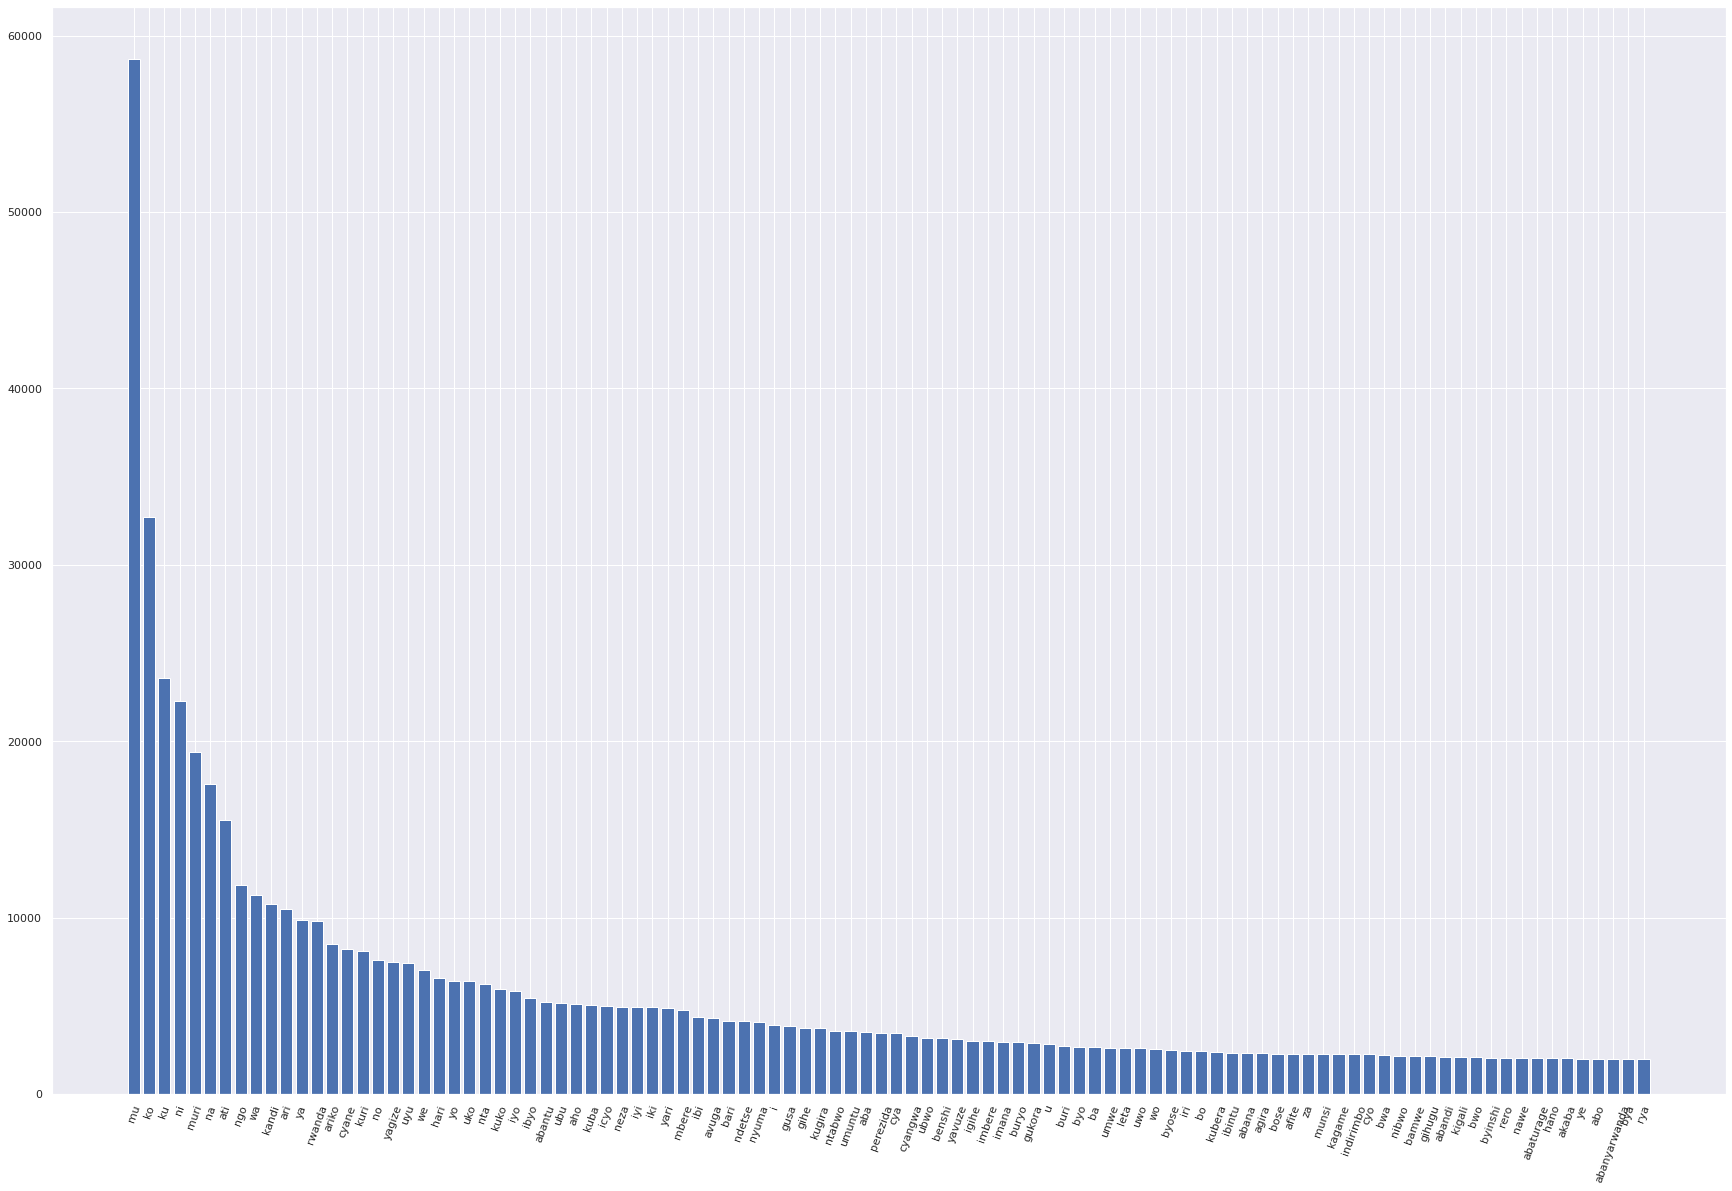

In [11]:
fig,ax = plt.subplots()
topn = common[:100]
ax.bar([c[0] for c in topn], [c[1] for c in topn]);
fig.set_size_inches(30,20)
ax.set_xticklabels([c[0] for c in topn], rotation=70);

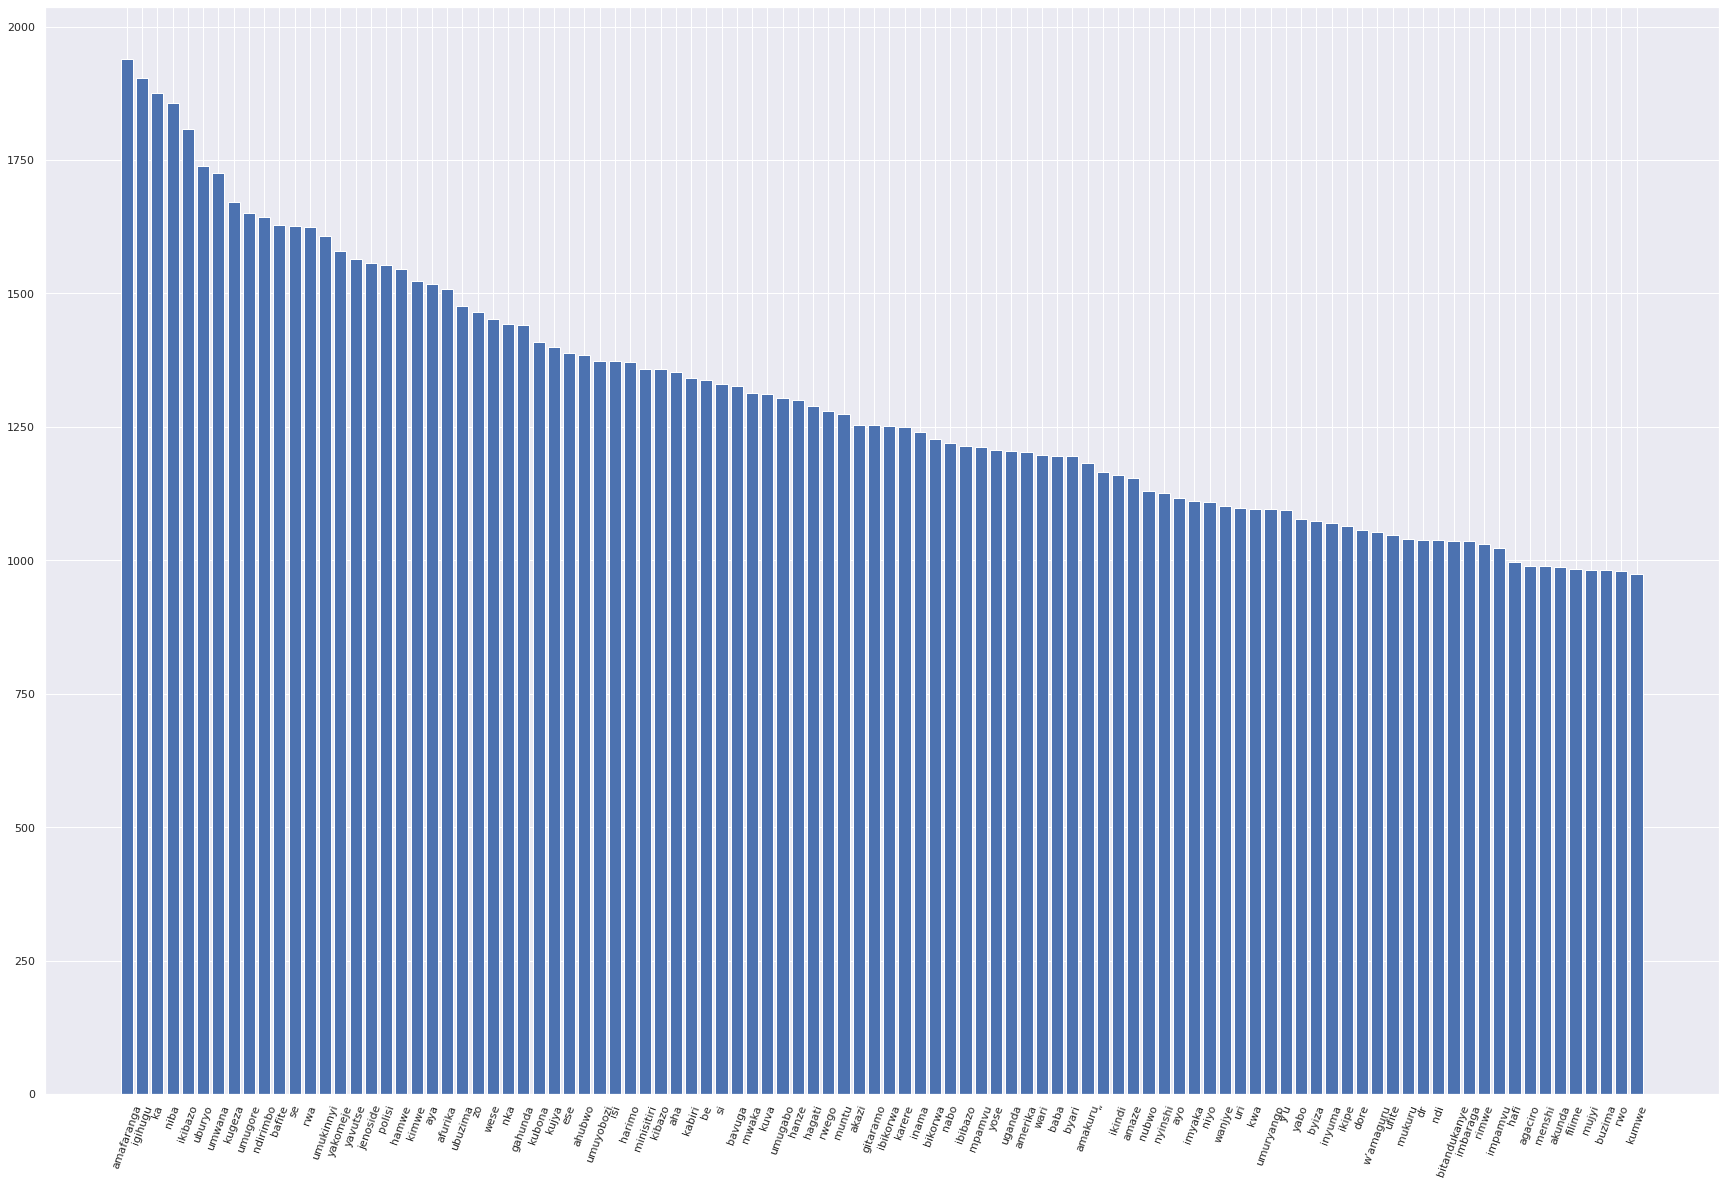

In [12]:
fig,ax = plt.subplots()
topn = common[100:200]
ax.bar([c[0] for c in topn], [c[1] for c in topn]);
fig.set_size_inches(30,20)
ax.set_xticklabels([c[0] for c in topn], rotation=70);

In [21]:
print(len(common))
longer_words = [wc for wc in common if len(wc[0]) > 2]
print(len(longer_words), len(common) - len(longer_words))

143999
143708 291


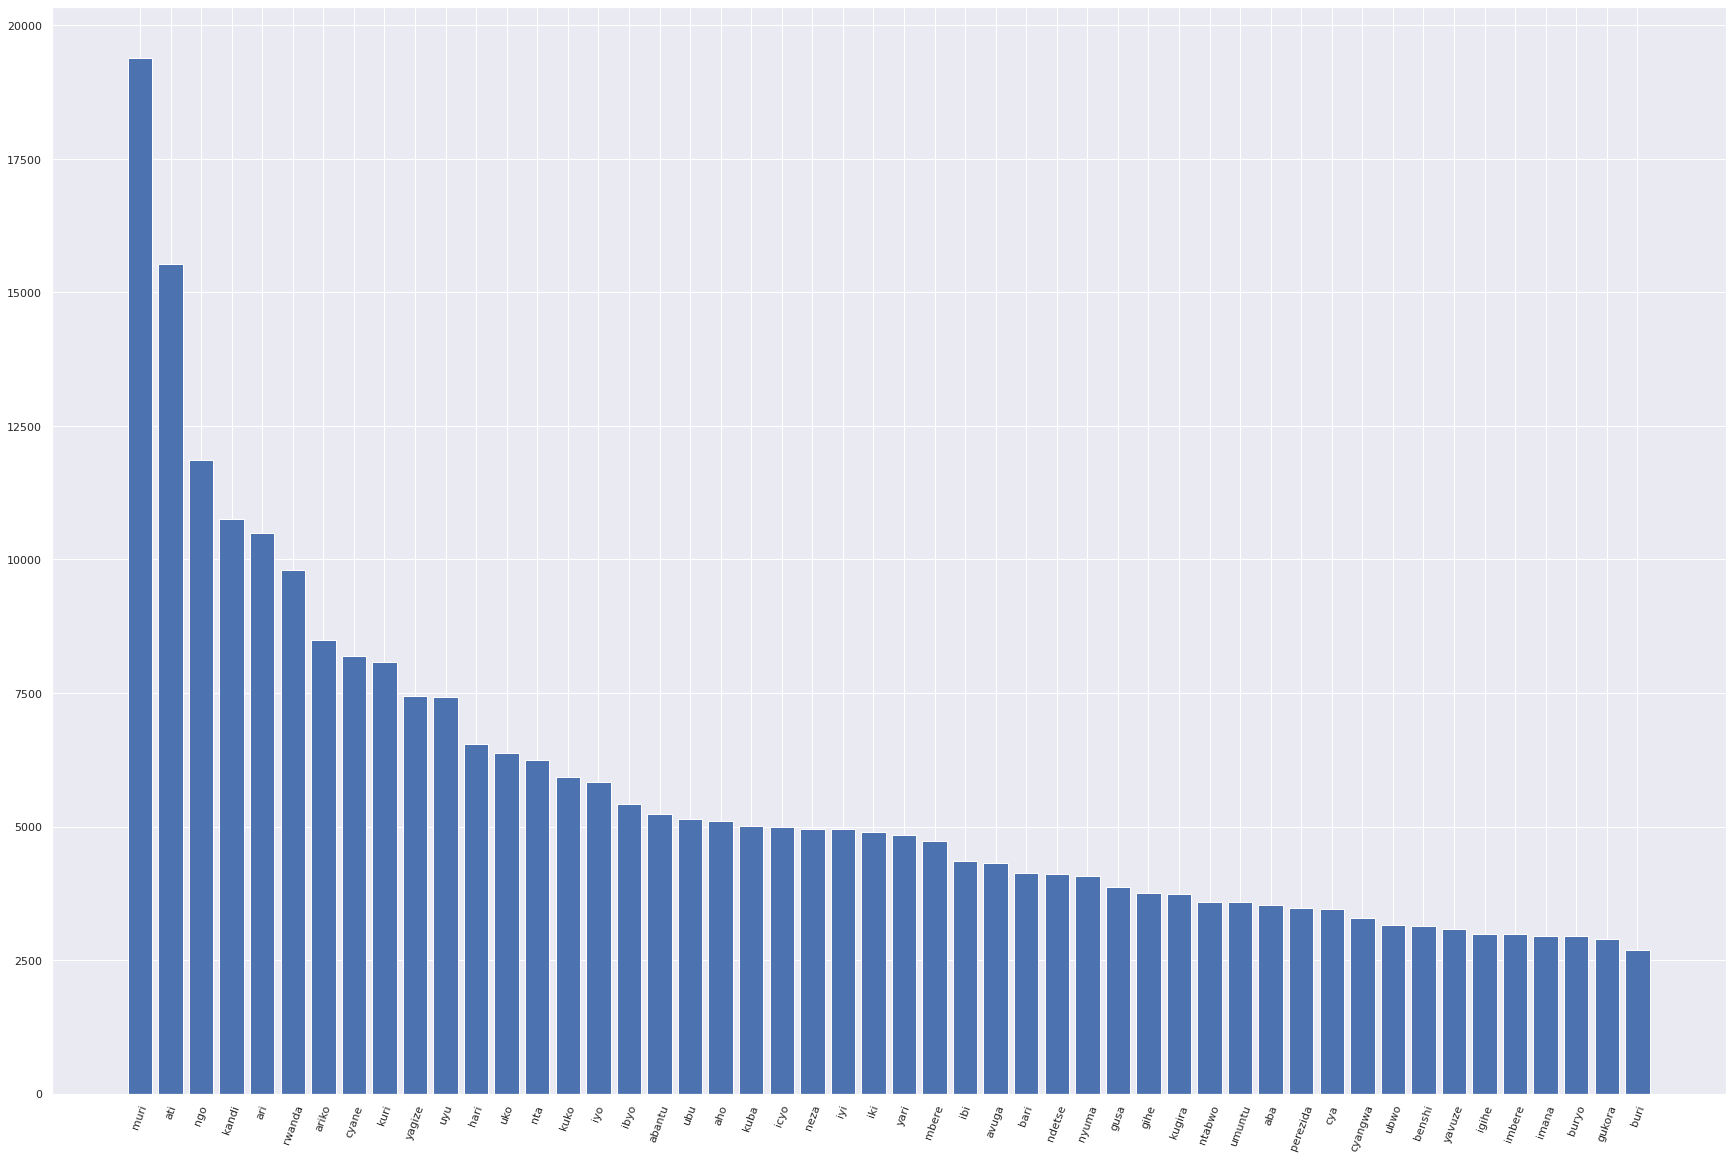

In [22]:
fig,ax = plt.subplots()
topn = longer_words[:50]
ax.bar([c[0] for c in topn], [c[1] for c in topn]);
fig.set_size_inches(30,20)
ax.set_xticklabels([c[0] for c in topn], rotation=70);

In [23]:
longer_words[:250]

[('muri', 19382),
 ('ati', 15535),
 ('ngo', 11862),
 ('kandi', 10765),
 ('ari', 10490),
 ('rwanda', 9803),
 ('ariko', 8486),
 ('cyane', 8190),
 ('kuri', 8088),
 ('yagize', 7454),
 ('uyu', 7417),
 ('hari', 6554),
 ('uko', 6385),
 ('nta', 6245),
 ('kuko', 5935),
 ('iyo', 5840),
 ('ibyo', 5417),
 ('abantu', 5237),
 ('ubu', 5139),
 ('aho', 5105),
 ('kuba', 5016),
 ('icyo', 4998),
 ('neza', 4949),
 ('iyi', 4947),
 ('iki', 4902),
 ('yari', 4851),
 ('mbere', 4732),
 ('ibi', 4347),
 ('avuga', 4312),
 ('bari', 4140),
 ('ndetse', 4120),
 ('nyuma', 4067),
 ('gusa', 3870),
 ('gihe', 3750),
 ('kugira', 3734),
 ('ntabwo', 3591),
 ('umuntu', 3580),
 ('aba', 3531),
 ('perezida', 3477),
 ('cya', 3450),
 ('cyangwa', 3295),
 ('ubwo', 3166),
 ('benshi', 3145),
 ('yavuze', 3089),
 ('igihe', 2996),
 ('imbere', 2982),
 ('imana', 2961),
 ('buryo', 2954),
 ('gukora', 2899),
 ('buri', 2693),
 ('byo', 2682),
 ('umwe', 2627),
 ('leta', 2587),
 ('uwo', 2585),
 ('byose', 2480),
 ('iri', 2426),
 ('kubera', 2390),
 (

In [24]:
# with open("/home/mark/tinyspeech_harvard/frequent_words/rw/frequencies.csv", 'w') as fh:
#     for w,c in longer_words[:250]:
#         fh.write(f"{w},{c}\n")

In [28]:
q = [w for w,c in longer_words[:250] if c > 1000]
len(q)

167

/home/mark/miniconda3/envs/tinyspeech/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


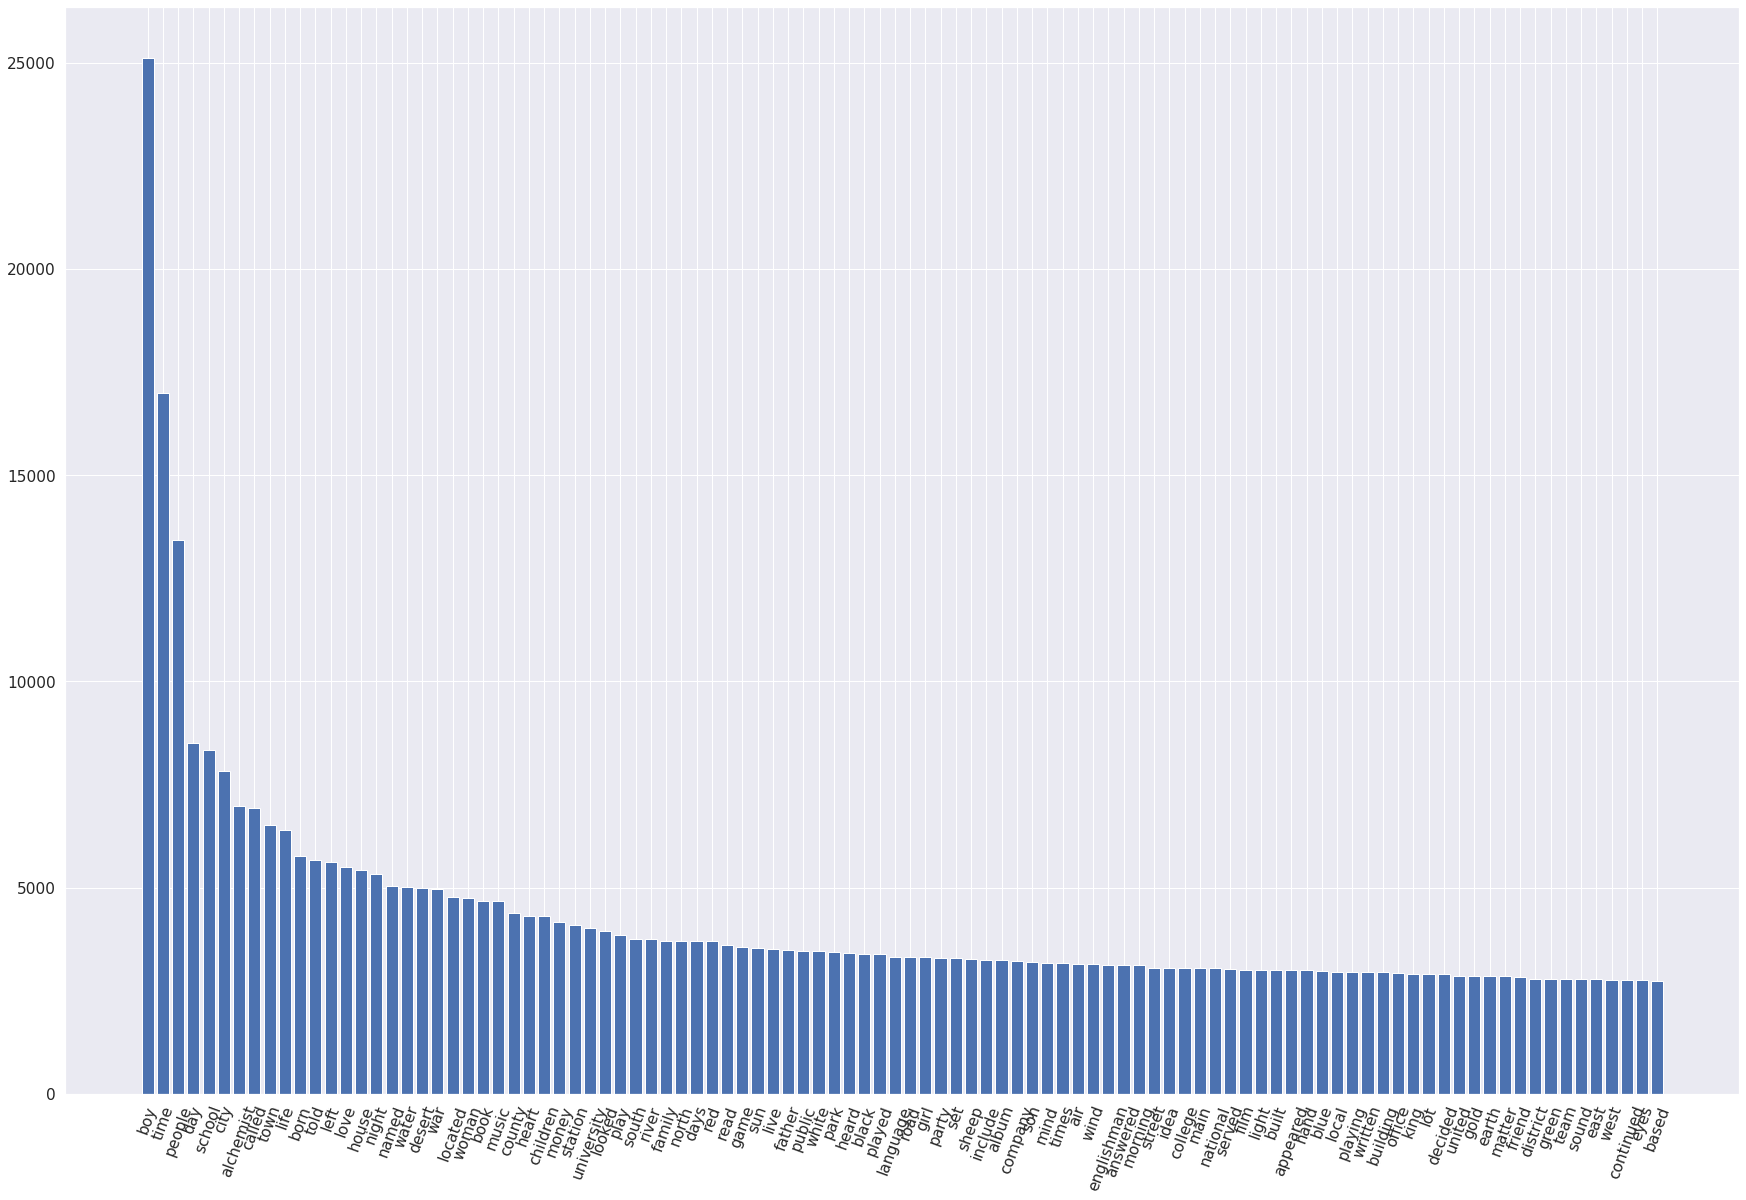

In [88]:
fig,ax = plt.subplots()
topn = filtered_en.most_common(100)
ax.bar([c[0] for c in topn], [c[1] for c in topn]);
fig.set_size_inches(30,20)
ax.set_xticklabels([c[0] for c in topn], rotation=70);

In [90]:
data = []
for lang,(frequencies, frequencies_without_stopwords) in counts.items():
    if frequencies_without_stopwords is not None:
        data.append((lang, frequencies.most_common(1), frequencies.most_common(100)[-1], frequencies_without_stopwords.most_common(1), frequencies_without_stopwords.most_common(100)[-1]))
    else:
        data.append((lang, frequencies.most_common(1), frequencies.most_common(100)[-1]))
pd.DataFrame(data, columns=["lang", "most common word", "100th most common word", "most common non-stopword", "100th most common non-stopword"])

,lang,most common word,100th most common word,most common non-stopword,100th most common non-stopword
0,pl,"[(—, 19949)]","(dobrze, 537)","[(—, 19949)]","(lubię, 220)"
1,id,"[(saya, 2157)]","(siapa, 68)","[(tom, 586)]","(kobayashi, 36)"
2,de,"[(die, 138036)]","(damit, 4258)","[(hauptstadt, 10877)]","(gehören, 943)"
3,ja,"[(はち, 46)]","(彼等が敵に向かうとはあっぱれであった。, 2)","[(はち, 46)]","(彼女は迷子になった男の子を探しまわった。, 2)"
4,cy,"[(yn, 29357)]","(bobl, 744)",None,None
5,eo,"[(la, 27642)]","(bona, 426)","[(pri, 2006)]","(vidas, 227)"
6,eu,"[(eta, 12922)]","(egon, 440)","[(behar, 2258)]","(ikusten, 334)"
7,uk,"[(не, 2665)]","(тільки, 115)","[(не, 2665)]","(них, 77)"
8,ca,"[(de, 175575)]","(ni, 2589)","[(venim, 11417)]","(segona, 1299)"
9,br,"[(a, 1625)]","(perak, 61)","[(sur, 140)]","(barzh, 18)"


In [156]:
",".join(words)

'went,left,love,three,those,every,still,use,man,house,desert,little,light,first,after,city,group,state,heart,through,other,used,between,where,only,early,last,sheep,looking,good,blue,everything,point,see,began,main,thing,east,think,both,night,long,nothing,father,written,county,going,under,go,mind,people,children,during,public,must,based,second,again,served,would,something,next,put,mean,please,sound,very,continued,river,day,old,set,boy,park,large,son,should,ever,want,away,who,few,also,decided,company,girl,include,different,around,some,never,wind,named,time,these,read,than,give,help,north,gold,now,game,took,then,sun,air,times,answered,everyone,here,things,being,became,find,will,part,such,number,hand,family,today,office,seen,college,born,found,before,area,made,well,anything,known,lot,own,film,building,six,many,men,always,book,earth,west,does,way,show,take,high,morning,look,several,district,even,might,end,because,one,nine,friend,team,much,later,five,could,year,four,saw,united,more,war,stati

In [158]:
"desert,city,between,early,looking,everything,night,nothing,father,written,county,people,children,public,second,something,continued,river,decided,company,include,different,around,answered,everyone,became,family,office,college,anything,building,earth,morning,district,friend,united,station,alchemist,englishman,road,work,without,language,university,water,music,system,playing,party,fire,king,school,better,national,world,home".count(",")

55

In [59]:
top_300 = en.most_common(300)
# went through these by hand and deleted a few "boring" words, plus super common stop words like 'the', 'a', etc
with open("../frequent_words/en/en_most_frequent_chosen.txt",'r') as fh:
    manually_filtered = fh.read()
#manually_filtered = eval(manually_filtered) 

In [ ]:
t3_words = [w for w,_ in manually_filtered]
common_words = [t for t in manually_filtered]
for w,c in filtered_en.most_common(100):
    if w not in t3_words:
        print(w)
        common_words.append((w,c))

In [68]:
common_words.sort(key=lambda x: x[1])
common_words = list(reversed(common_words))

/home/mark/miniconda3/envs/tinyspeech/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


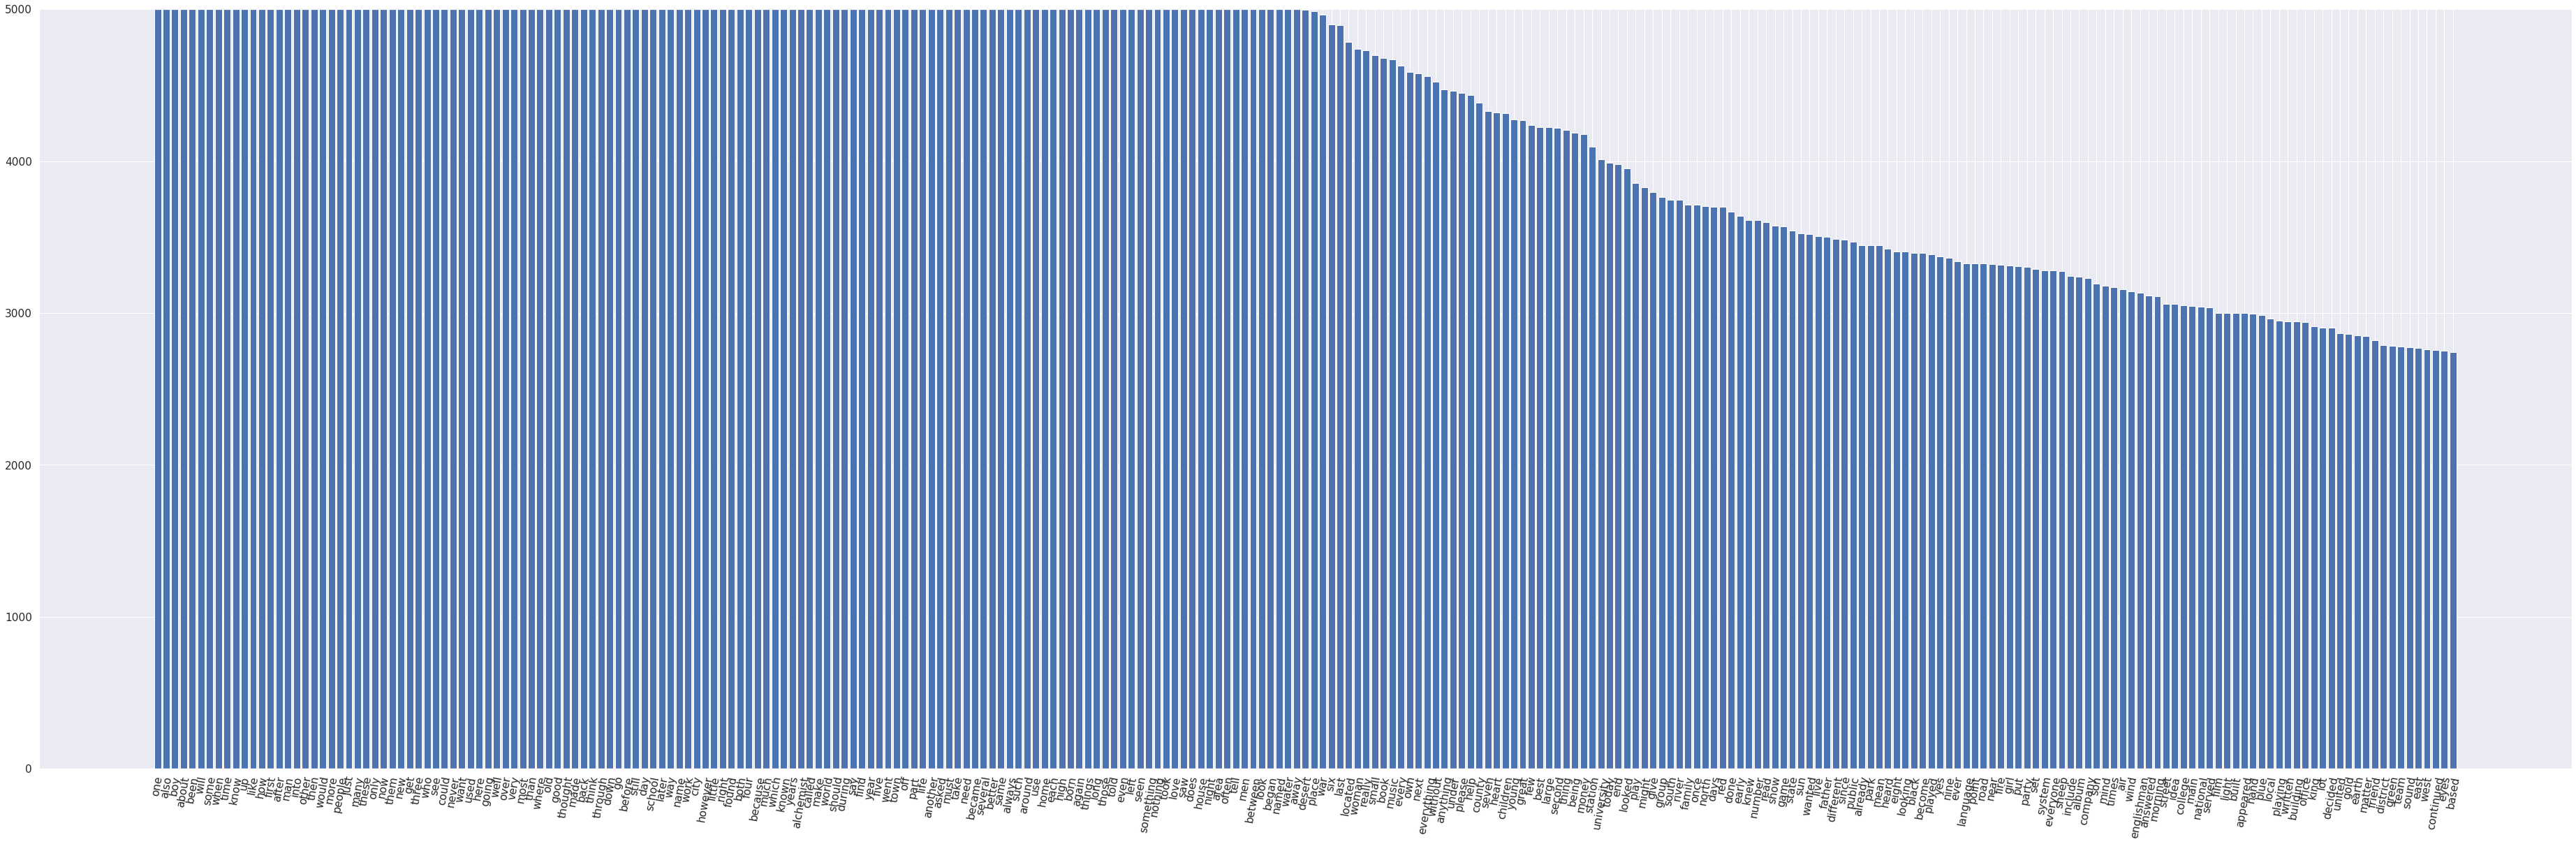

In [73]:
fig,ax = plt.subplots()
ax.bar([c[0] for c in common_words], [c[1] for c in common_words]);
fig.set_size_inches(65,20)
ax.set_xticklabels([c[0] for c in common_words], rotation=80);
ax.set_ylim(0,5000);

In [77]:
len(common_words)

265

In [76]:
" ".join([f"{w} ({c})," for w,c in common_words])

'one (32492), also (30842), boy (25103), about (20706), been (20344), will (17860), some (17722), when (17257), time (16986), know (16481), up (16462), like (16422), how (16046), first (15369), after (15296), man (15277), into (15209), other (15061), then (15048), would (14720), more (14410), people (13432), just (13387), many (13229), these (13204), only (13171), now (13080), them (13023), new (12825), get (12570), three (12037), who (12022), see (11529), could (11483), never (11282), want (11168), used (10677), here (10547), going (10484), well (10403), over (10302), very (10266), most (10225), than (10163), where (10025), old (9897), good (9716), thought (9567), made (9551), back (9166), think (9087), through (8850), down (8705), go (8685), before (8575), still (8568), day (8510), school (8347), later (8253), way (8251), name (8196), work (7949), city (7822), however (7812), little (7563), right (7561), found (7318), both (7246), four (7237), because (7235), much (7186), which (7163

In [104]:
filemap = {}
for root, dirs, files in os.walk(pathlib.Path("/home/mark/tinyspeech_harvard") / "tmp"):
    if not files:
        continue # this is the top level dir
    print(root, files)
    for f in files:
        bn = os.path.splitext(f)[0]
        if bn in filemap:
            raise ValueError(f"{bn} already present in filemap")
        filemap[bn] = os.path.join(root, f)
filemap        

/home/mark/tinyspeech_harvard/tmp/c ['v.txt', 'm', 'l']
/home/mark/tinyspeech_harvard/tmp/b ['r', 'q', 's']
/home/mark/tinyspeech_harvard/tmp/a ['x', 'z', 'y']


{'v': '/home/mark/tinyspeech_harvard/tmp/c/v.txt',
 'm': '/home/mark/tinyspeech_harvard/tmp/c/m',
 'l': '/home/mark/tinyspeech_harvard/tmp/c/l',
 'r': '/home/mark/tinyspeech_harvard/tmp/b/r',
 'q': '/home/mark/tinyspeech_harvard/tmp/b/q',
 's': '/home/mark/tinyspeech_harvard/tmp/b/s',
 'x': '/home/mark/tinyspeech_harvard/tmp/a/x',
 'z': '/home/mark/tinyspeech_harvard/tmp/a/z',
 'y': '/home/mark/tinyspeech_harvard/tmp/a/y'}

In [29]:
# generate a filepath map from mp3 filename to textgrid
def generate_filemap(lang_isocode="en", alignment_basedir="/home/mark/tinyspeech_harvard/common-voice-forced-alignments/"):
    filemap = {}
    for root, dirs, files in os.walk(pathlib.Path(alignment_basedir) / lang_isocode / "alignments"):
        if not files:
            continue # this is the top level dir
        for textgrid in files:
            mp3name = os.path.splitext(textgrid)[0]
            if mp3name in filemap:
                raise ValueError(f"{mp3name} already present in filemap")
            filemap[mp3name] = os.path.join(root, textgrid)
    return filemap

In [30]:
mp3_to_textgrid = generate_filemap(lang_isocode="rw")

In [31]:
for x in mp3_to_textgrid.items():
    print(x)
    break
print(len(mp3_to_textgrid))

('common_voice_rw_19833295', '/home/mark/tinyspeech_harvard/common-voice-forced-alignments/rw/alignments/b49b5fe13e84b2c7888108bf37ee7ddd9d067c18cd2bb0e7e15225379edd5cdfea91e8672f305a8a0d652dea200bfefb249576fc070a3f0462d8f43e4f41bbae/common_voice_rw_19833295.TextGrid')
215468


In [32]:
def generate_wordtimings(common_words, mp3_to_textgrid, lang_isocode="en", alignment_basedir="../common-voice-forced-alignments/"):
    common_wordlist = set([w for w,_ in common_words])
    # columns: mp3_filename, start_time_s, end_time_s
    dfs = {w : [] for w in common_wordlist}
    notfound = []
    found = False
    csvpath = pathlib.Path(alignment_basedir) / lang_isocode / "validated.csv"
    # common voice csv from DeepSpeech/import_cv2.py
    with open(csvpath, 'r') as fh:
        reader = csv.reader(fh)
        for ix,row in enumerate(reader):
            if ix == 0:
                continue # skips header
            if ix % 50_000 == 0:
                print(ix)
            # find words in common_words set from each row of csv
            mp3name_no_extension = os.path.splitext(row[0])[0]
            words = row[2].split()
            for word in words:
                if word not in common_wordlist:
                    continue
                # get alignment timings for this word
                try:
                    tgf = mp3_to_textgrid[mp3name_no_extension]
                except KeyError as e:
                    notfound.append((mp3name_no_extension, word))
                tg = textgrid.TextGrid.fromFile(tgf)
                for interval in tg[0]:
                    if interval.mark != word:
                        continue
                    start_s = interval.minTime
                    end_s = interval.maxTime
                    dfs[word].append((mp3name_no_extension, start_s, end_s))
    return dfs, notfound

In [ ]:
#mp3_path = (pathlib.Path(common_voice_clips) / mp3name_no_extension).with_suffix(".mp3") 
#duration = sox.file_info_duration(mp3_path)

In [33]:
timings, notfound = generate_wordtimings(longer_words[:250], mp3_to_textgrid, lang_isocode="rw")

50000
100000
150000
200000


In [153]:
len(notfound)

85

In [156]:
#with open('/home/mark/tinyspeech_harvard/frequent_words/en/notfound.txt', 'w') as fh:
#    fh.write(str(notfound))

In [2]:
import pickle

In [35]:
#with open("/home/mark/tinyspeech_harvard/frequent_words/rw/all_timings.pkl", "wb") as fh:
#    pickle.dump(timings, fh)

In [3]:
with open("/home/mark/tinyspeech_harvard/frequent_words/rw/all_timings.pkl", "rb") as fh:
    timings = pickle.load(fh)

In [4]:
df_dest = pathlib.Path("/home/mark/tinyspeech_harvard/frequent_words/rw/timings")
for word, times in timings.items():
    df = pd.DataFrame(times, columns=["mp3_filename", "start_time_s", "end_time_s"])
    if df.shape[0] > 2500:
        print(word, "SUBSAMPLING")
        df = df.sample(n=2500, replace=False)
    print(df_dest / (word + ".csv"))
    df.to_csv(df_dest / (word + ".csv"), quoting=csv.QUOTE_MINIMAL, index=False)

/home/mark/tinyspeech_harvard/frequent_words/rw/timings/rwego.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/wari.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/y’u.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/mujyi.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/aha.csv
ubwo SUBSAMPLING
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/ubwo.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/umutekano.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/bimwe.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/hano.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/bafite.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/kaminuza.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/afurika.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/turi.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/wanjye.csv
/home/mark/tinyspeech_harvard/frequent_words/rw/timings/

In [39]:
df.head()

,mp3_filename,start_time_s,end_time_s
0,common_voice_rw_19834046,2.26,2.76
1,common_voice_rw_19834324,1.18,1.79
2,common_voice_rw_20914451,4.77,5.08
3,common_voice_rw_19541693,2.44,2.99
4,common_voice_rw_19834821,0.83,1.15


In [168]:
val_df = pd.read_csv("../common_voice/en/validated.tsv", sep="\t") # english corpus

/home/mark/miniconda3/envs/tinyspeech/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [181]:
mp3_to_textgrid["common_voice_en_19754389"]

'/home/mark/tinyspeech_harvard/common-voice-forced-alignments/en/alignments/5fe7e25e6549cf60dc33a695678d1cdab60dbfc36fcb55e216b6bc9becc2d9bc43b726d680eb33ff17002680681b8cd5f485b7c97235f459b8b5e716977dd2f5/common_voice_en_19754389.TextGrid'

In [187]:
r = val_df[val_df.path == "common_voice_en_19754389.mp3"]
r.iloc[0,2]

'The old runway near to Mountbatten Road is now called Old Airport Road.'

In [177]:
# find duplicate words in a given sentence
files = set()
with open("../frequent_words/en/timings/road.csv", 'r') as fh:
    reader = csv.reader(fh)
    next(reader)
    for ix,row in enumerate(reader):
        f = row[0]
        if f in files:
            print(f, row[1], row[2])
            if ix > 20:
                break
        files.add(f)

common_voice_en_19754389 4.98 5.29
common_voice_en_19754389 2.86 3.15
common_voice_en_19754389 4.98 5.29
common_voice_en_21274439 2.84 3.12


In [ ]:
freqs = []
for word, ts in timings.items():
    freqs.append((word, len(ts)))
freqs.sort(key=lambda x: x[1])
freqs[::-1]

# Speech Commands word frequency analysis

In [3]:
speech_commands_dataset = [
    ("Backward", 1664, True),
    ("Bed", 2014, False),
    ("Bird", 2064, False),
    ("Cat", 2031, False),
    ("Dog", 2128, False),
    ("Down", 3917, True),
    ("Eight", 3787, True),
    ("Five", 4052, True),
    ("Follow", 1579, True),
    ("Forward", 1557, True),
    ("Four", 3728, True),
    ("Go", 3880, True),
    ("Happy", 2054, False),
    ("House", 2113, False),
    ("Learn", 1575, True),
    ("Left", 3801, True),
    ("Marvin", 2100, False),
    ("Nine", 3934, True),
    ("No", 3941, True),
    ("Off", 3745, True),
    ("On", 3845, True),
    ("One", 3890, True),
    ("Right", 3778, True),
    ("Seven", 3998, True),
    ("Sheila", 2022, False),
    ("Six", 3860, True),
    ("Stop", 3872, True),
    ("Three", 3727, True),
    ("Tree", 1759, False),
    ("Two", 3880, True),
    ("Up", 3723, True),
    ("Visual", 1592, True),
    ("Wow", 2123, False),
    ("Yes", 4044, True),
    ("Zero", 4052, True),
]

In [4]:
speech_commands_dataset = [(k.lower(), c, t) for (k,c,t) in speech_commands_dataset]

In [5]:
sc = pd.DataFrame(speech_commands_dataset, columns=['keyword', 'counts', 'command'])

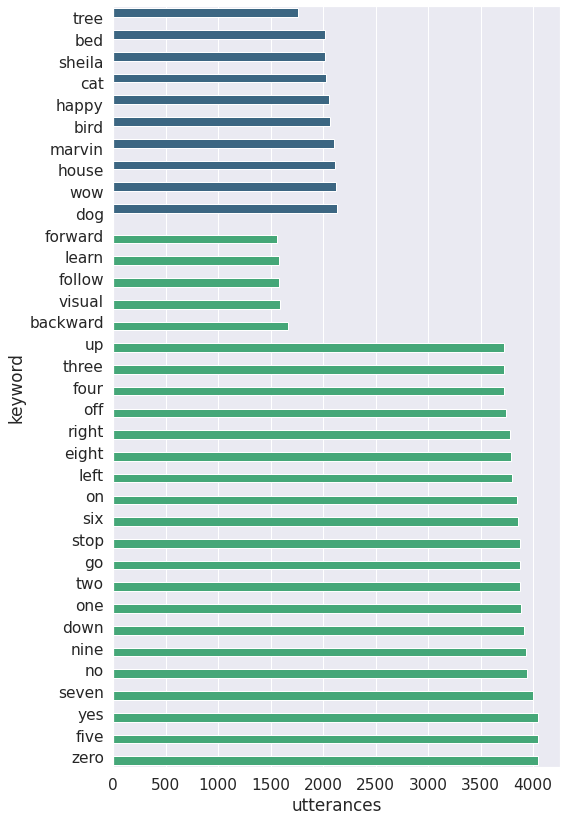

In [9]:
sns.barplot(
    x="counts",
    y="keyword",
    hue="command",
    palette="viridis",
    data=sc.sort_values(["command", "counts"]),
)
plt.gcf().set_size_inches(8, 14)
plt.gca().get_legend().set_visible(False)
plt.gca().set_xlabel("utterances");

In [8]:
keywords = set([k for (k, _, _) in speech_commands_dataset])

In [65]:
def clean_and_filter(keyword_set: Set[str], sentence: str) -> List[str]:
    tokens = nltk.word_tokenize(sentence)
    words = [word.lower() for word in tokens if word.isalpha()]
    return list(filter(lambda w: w in keyword_set, words))

def update_counts(counts: Dict[str, int], words: List[str]) -> None:
    for w in words:
        counts[w] += 1

def count_occurences(keyword_set, tsv):
    df = pd.read_csv(tsv, sep="\t")
    
    # there are NaNs in test.tsv['sentence']
    # https://stackoverflow.com/a/50533971
    df.sentence.dropna(inplace=True)
    
    print("Dataset:", tsv)
    print("Number of mp3s:", df.shape[0])
    
    #def tokenize_by_keyword(row):
    #    return clean_and_filter(keyword_set, row.sentence)

    counts = {k:0 for k in keyword_set}
    
    # TODO(MMAZ) inefficient
    df['keywords'] = df.sentence.apply(functools.partial(clean_and_filter, keyword_set))
    
    df.keywords.dropna(inplace=True)
    usable = df.keywords.transform(len)
    print("mp3s containing speechcommands keywords", usable[usable > 0].shape[0])
    
    _ = [update_counts(counts, tokens) for tokens in df.keywords]
    
    return counts

In [10]:
def plot_counts(counts, title):
    df = pd.DataFrame(list(counts.items()), columns=["keyword", "counts"])
    sns.barplot(x="counts", y="keyword", data=df).set_title(title)
    plt.gcf().set_size_inches(10, 15)

In [74]:
def plot_uncommon(
    counts, title, common=["on", "one", "two", "three", "four", "no", "up", "down"]
):
    """view counts without the most common words"""
    without = {k: v for k, v in counts.items() if k not in common}
    plot_counts(without, title)

## Common Voice Analysis

Data is split across these TSVs in Common Voice. 

In [11]:
# TSVs
common_voice = "../mozilla_common_voice/"
TRAIN = common_voice + "train.tsv"
DEV = common_voice + "dev.tsv"
TEST = common_voice + "test.tsv"
VAL = common_voice + "validated.tsv"
# ignoring {other, invalidated}

Dataset: ../mozilla_common_voice/train.tsv
Number of mp3s: 232975
mp3s containing speechcommands keywords 44917


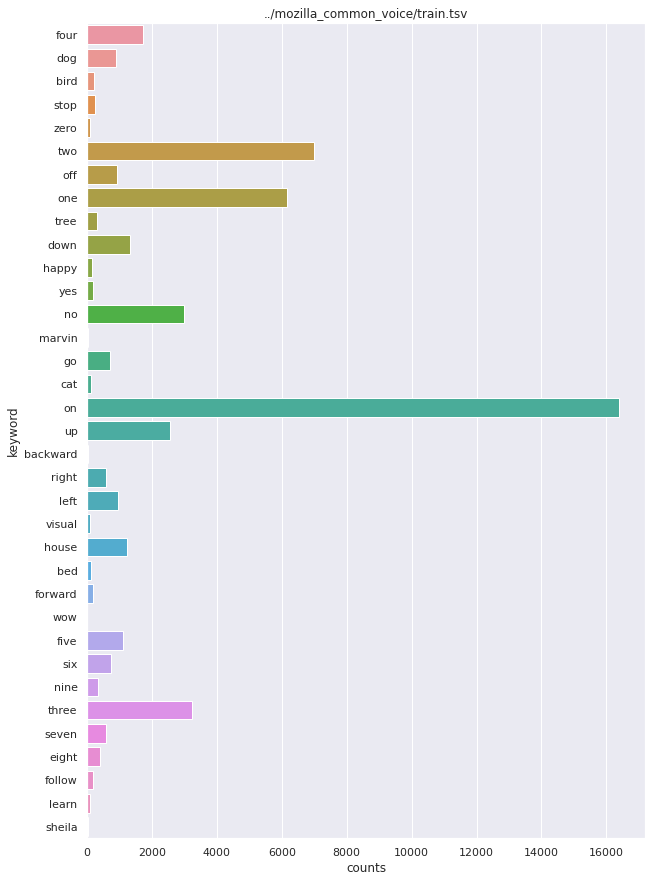

In [69]:
train_counts = count_occurences(keywords, TRAIN)
plot_counts(train_counts, TRAIN)

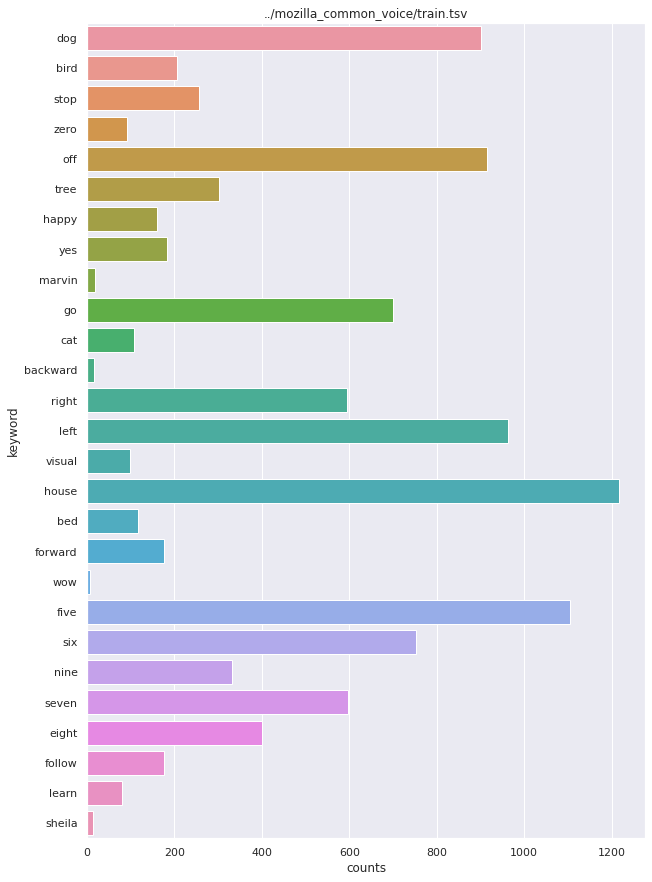

In [75]:
plot_uncommon(train_counts, TRAIN)

Dataset: ../mozilla_common_voice/dev.tsv
Number of mp3s: 15531
mp3s containing speechcommands keywords 2830


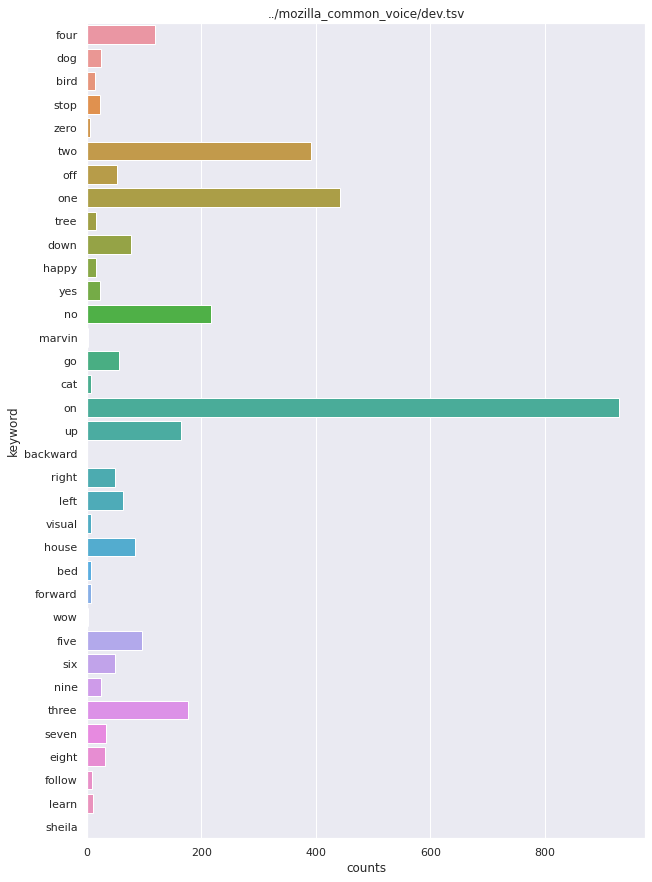

In [76]:
dev_counts = count_occurences(keywords, DEV)
plot_counts(dev_counts, DEV)

Dataset: ../mozilla_common_voice/test.tsv
Number of mp3s: 15531
mp3s containing speechcommands keywords 3121


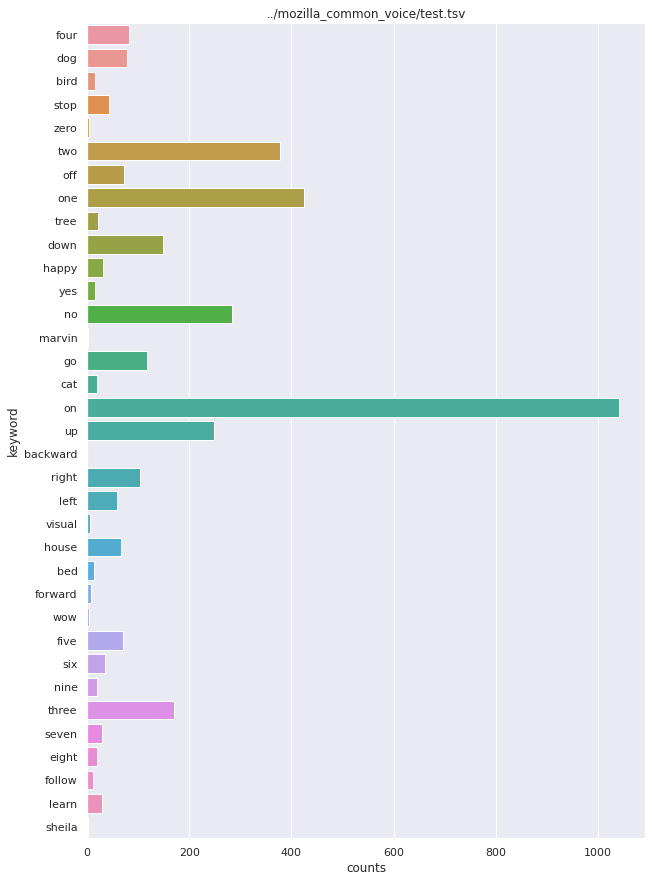

In [77]:
test_counts = count_occurences(keywords, TEST)
plot_counts(test_counts, TEST)

In [52]:
# sidenote: there's a bad row in test.tsv:
df = pd.read_csv(TEST, sep="\t")
df[df.sentence.isna()]

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
458,2a23c7be6a9665215496be5e793ad9a334721810990672...,common_voice_en_16759015.mp3,NaN,2,0,NaN,NaN,NaN


### `validated.tsv`

Note that `validated.tsv` is much larger than all of the splits (train/dev/test) combined. [See here for details:](https://discourse.mozilla.org/t/why-train-tsv-includes-a-few-files-just-3-of-validated-set/36471/6)

> The reason is that many sentences were read multiple times by different people, and in machine learning you do not want a training set to be biased or it will result in a biased model trained from the biased training data set. So repeats of read sentences, even though validated, were removed when validated.tsv was distributed among train.tsv, dev.tsv, and test.tsv.

/home/mark/miniconda3/envs/deepspeech/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Dataset: ../mozilla_common_voice/validated.tsv
Number of mp3s: 854444
mp3s containing speechcommands keywords 162362


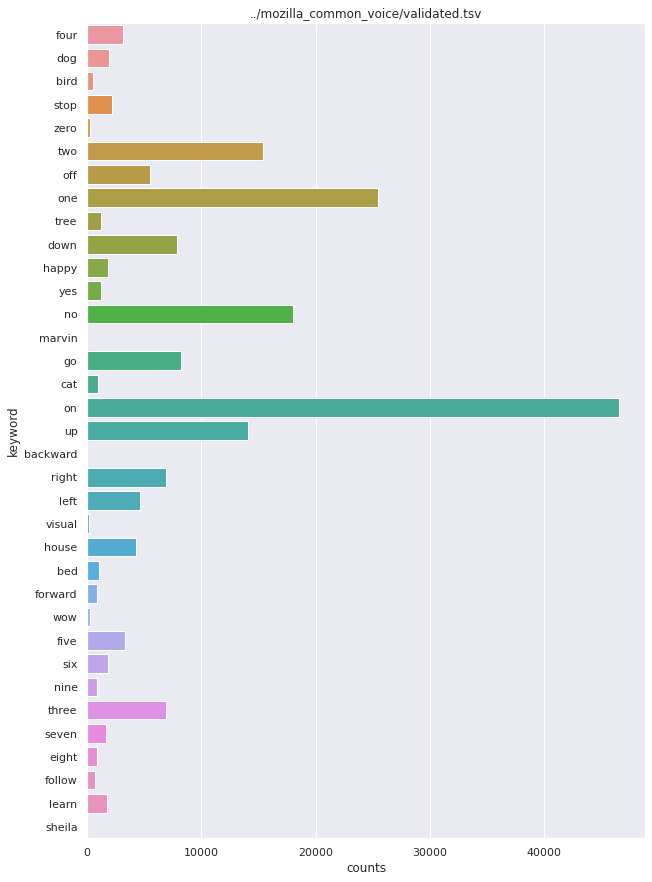

In [78]:
val_counts = count_occurences(keywords, VAL)
plot_counts(val_counts, VAL)

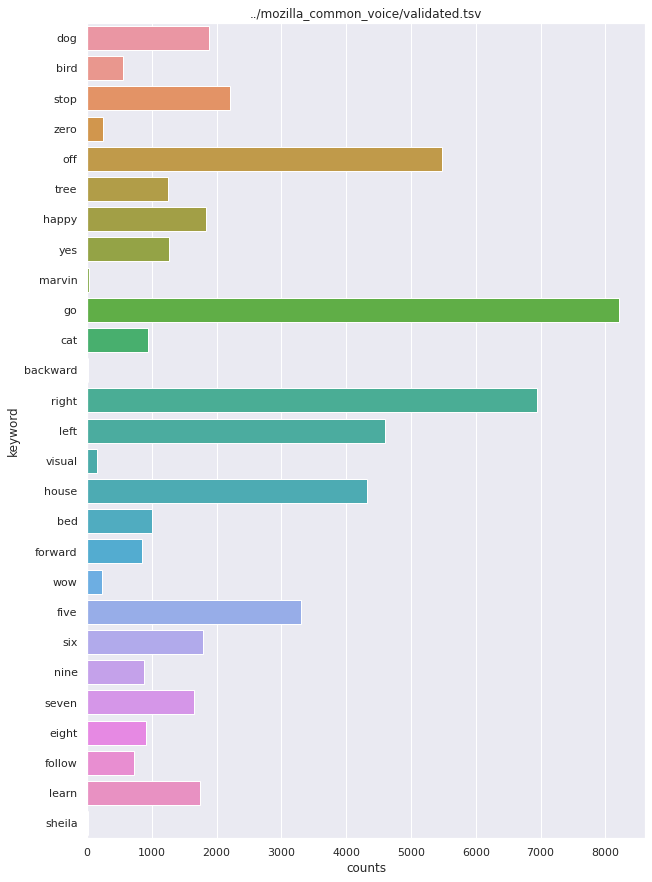

In [79]:
plot_uncommon(val_counts, VAL)

## Comparing the Common Voice data in aggregate with Speech Commands

In [141]:
train_df = pd.DataFrame(train_counts.items(), columns=["keyword", "train"])
dev_df = pd.DataFrame(dev_counts.items(), columns=["keyword", "dev"])
test_df = pd.DataFrame(test_counts.items(), columns=["keyword", "test"])
val_df = pd.DataFrame(val_counts.items(), columns=["keyword", "val"])

Combining train/dev/test

In [142]:
comparison = pd.concat([train_df.keyword, sc.counts, train_df.train, dev_df.dev, test_df.test, val_df.val], axis=1, sort=False)
comparison.rename(columns={"counts":"speech_commands"},inplace=True)
comparison.insert(5, column="train/dev/test", value=train_df.train + dev_df.dev + test_df.test)

In [143]:
comparison

,keyword,speech_commands,train,dev,test,train/dev/test,val
0,four,1664,1726,118,83,1927,3176
1,dog,2014,901,24,79,1004,1882
2,bird,2064,206,13,16,235,559
3,stop,2031,257,22,42,321,2211
4,zero,2128,91,5,4,100,240
5,two,3917,6996,392,378,7766,15420
6,off,3787,914,52,73,1039,5475
7,one,4052,6149,443,424,7016,25485
8,tree,1579,302,16,21,339,1251
9,down,1557,1317,76,149,1542,7916


In [186]:
# TODO(MMAZ) this is a hacky/lazy way to rearrange for visualization
# speech_commands counts
s2 = sc[['keyword', 'counts']].copy()
s2['source'] = "speech_commands"
# train/dev/test counts
tdt = comparison[['keyword', 'train/dev/test']].copy()
tdt.rename(columns={"train/dev/test":"counts"},inplace=True)
tdt['source'] = 'train/dev/test'
# validation counts
v = comparison[['keyword', 'val']].copy()
v.rename(columns={"val":"counts"},inplace=True)
v['source']="validation"
# sandwich it together:
sc_vs_tdt = pd.concat([s2,tdt])
total = pd.concat([s2,tdt,v])

### Word frequency in Speech Commands vs Common Voice Train/Dev/Test

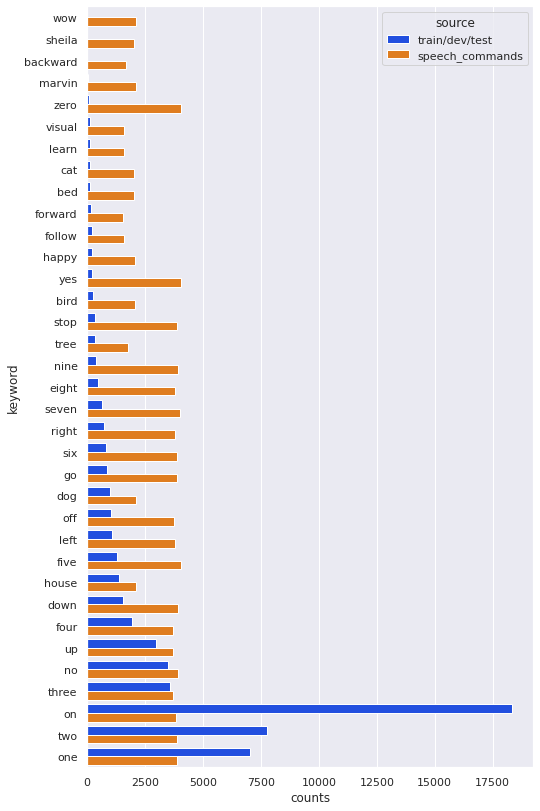

In [188]:
fig, ax = plt.subplots()
p = sns.barplot(
    x="counts",
    y="keyword",
    hue="source",
    palette="bright",
    data=sc_vs_tdt.sort_values(["counts"]),
    ax=ax
)
fig.set_size_inches(8, 14)
#p.set(xlim=(0,5000));

### Word frequency in Speech Commands vs Common Voice Train/Dev/Test vs Common Voice Validation

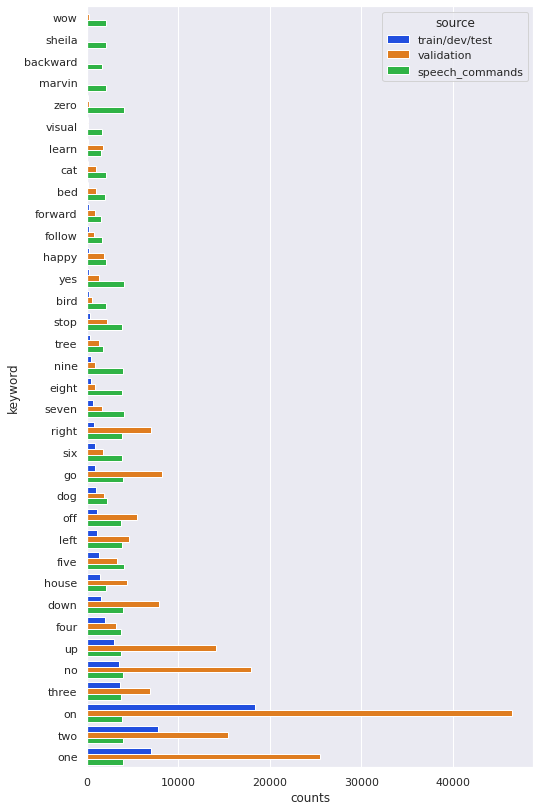

In [192]:
fig, ax = plt.subplots()
p = sns.barplot(
    x="counts",
    y="keyword",
    hue="source",
    palette="bright",
    data=total.sort_values(["counts"]),
    ax=ax
)
fig.set_size_inches(8, 14)

truncating at 5000:

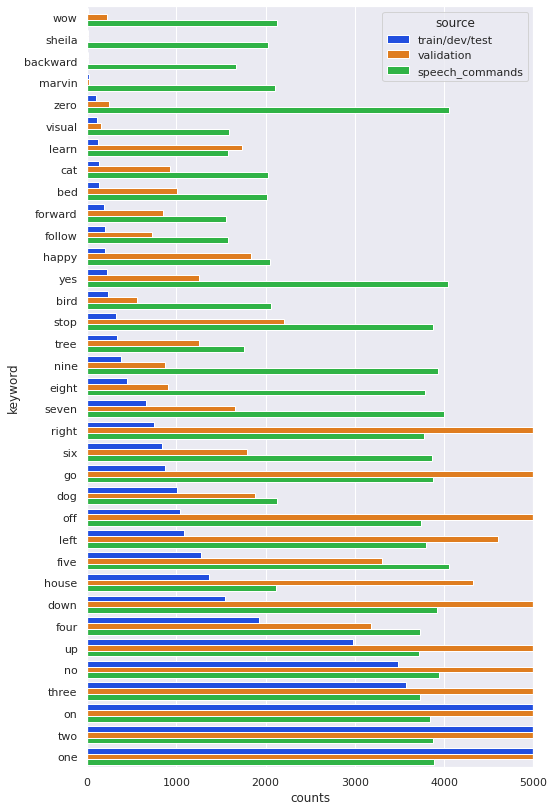

In [191]:
fig, ax = plt.subplots()
p = sns.barplot(
    x="counts",
    y="keyword",
    hue="source",
    palette="bright",
    data=total.sort_values(["counts"]),
    ax=ax
)
fig.set_size_inches(8, 14)
p.set(xlim=(0,5000));

## Questions

### 1. Should we include homonyms?

* `one`, `won`
* `two`, `to`
* `four`, `for`
* `right`, `write`
* `eight`, `ate`

any others? `house` vs `how's`? (marginal)

**Note:** `to` and `for` are overwhelmingly common [stop words](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html) - they might cause training biases.

### 2. What about plurals/stems/posessives?

* `bed` vs `beds` (non-command word)
* `backward` vs `backwards`
* `stop` vs `stops`
* `right` vs `rights`
* `house` vs `houses` vs `house's`
* etc...


In [161]:
homonyms = set(["won", "write", "ate"])
homonyms_count = count_occurences(homonyms, TRAIN)

Dataset: ../mozilla_common_voice/en/train.tsv
Number of mp3s: 232975
Sentences with speechcommands keywords 1059


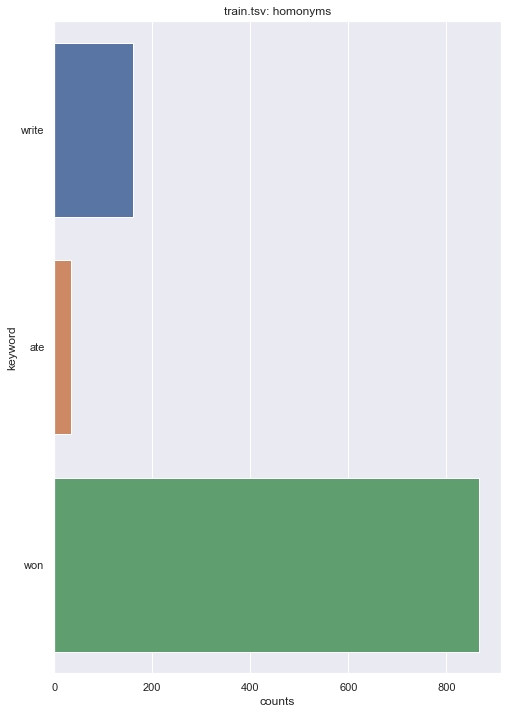

In [162]:
plot_counts(homonyms_count, "train.tsv: homonyms")

In [164]:
stopwords_count = count_occurences(set(["to", "for"]), TRAIN)

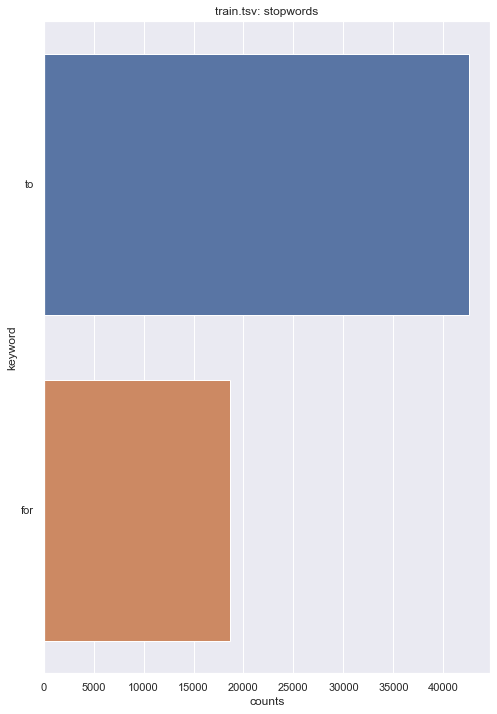

In [165]:
plot_counts(stopwords_count, "train.tsv: stopwords")

## Mozilla Common Voice Speech Commands
Single Word Target Segment
https://voice.mozilla.org/en/datasets
    


In [8]:
sw = "../commonvoice_singleword/cv-corpus-5-singleword"
langs = os.listdir(sw)
swcounts = {}
for lang in langs:
    validated = f"{sw}/{lang}/validated.tsv"
    with open(validated, 'r') as v:
        swcounts[lang] = sum(1 for line in v) - 1 # skip header
print(swcounts)
swcounts = pd.DataFrame(swcounts.items(), columns=["language", "validated"])

{'pl': 898, 'id': 101, 'de': 12191, 'ja': 503, 'cy': 232, 'eo': 770, 'eu': 170, 'ca': 2231, 'pt': 945, 'en': 26070, 'ar': 316, 'tr': 343, 'fr': 16467, 'tt': 5, 'ta': 203, 'es': 22290, 'nl': 447, 'ru': 1476}


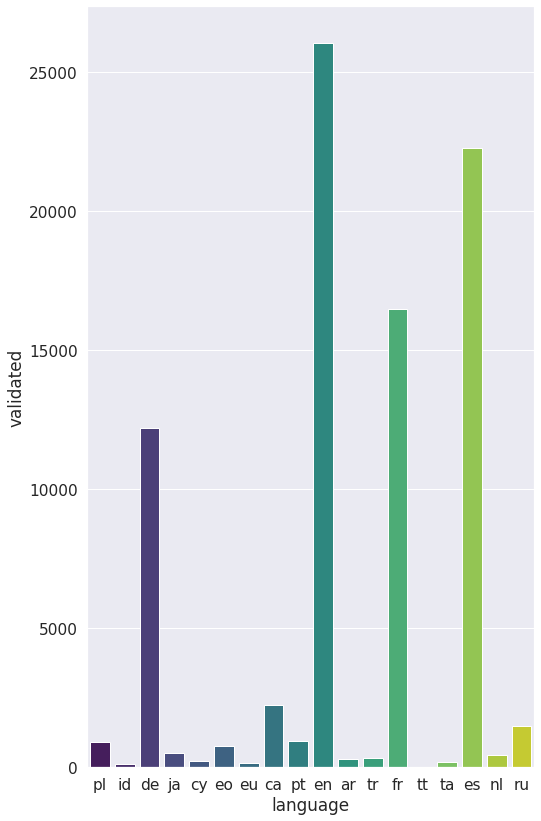

In [9]:
sns.barplot(
    x="language",
    y="validated",
    palette="viridis",
    data=swcounts
)
plt.gcf().set_size_inches(8, 14)